# Project: Investigate a Dataset TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Data Description
The TMDB movis dataset will be emplpoyed for this analysis. This dataset comprises a list of movies released between 1960 and 2015. Data fields enclude attribues for, amoung others; title, year released, production budget and revenue, as well as columns for inflation adjusted monetary values and movie ratings.

Questions:
The following questions will be addressed:
1. What genre was most popular for each individual year?
2. Which Genres were most popular overally?
3. What is the most expensive Genre to produce?
4. What is the most produced movies Genre?
6. What is the relationshp between selected variables?

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# load and view subset of the data
df_movies = pd.read_csv('..\\tmdb-movies.csv')
df_movies.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


From the previous cell it can be notices some of the columns contain multiple values genre, cast and production_companies. To allow for comprehensive analysis values will have to bve split into different rows. There is need to further checking of other name columns for multiple values

In [20]:
# check for demacation symbol for multiple values in columns: genres
df_movies.genres.tail(10)

10856                       Comedy|Drama|Family
10857                            Action|Western
10858                                Comedy|War
10859    Mystery|Science Fiction|Thriller|Drama
10860                                    Comedy
10861                               Documentary
10862                    Action|Adventure|Drama
10863                            Mystery|Comedy
10864                             Action|Comedy
10865                                    Horror
Name: genres, dtype: object

In [22]:
# check for demacation symbol for multiple values in columns: directors
df_movies.director.head(10)

0                   Colin Trevorrow
1                     George Miller
2                  Robert Schwentke
3                       J.J. Abrams
4                         James Wan
5    Alejandro GonzÃ¡lez IÃ±Ã¡rritu
6                       Alan Taylor
7                      Ridley Scott
8          Kyle Balda|Pierre Coffin
9                       Pete Docter
Name: director, dtype: object

Two additional columns include multiple values

In [5]:
#checking column titles for relavence to the analysis
df_movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [11]:
# Check column data types
df_movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

The data type for the release_date column which is a datetime object is incorrect. Id columns, id, idmb_id contain data that is not useful for analysis. all non-numeric columns with the exception of genres and original_title, do not contain information usefull to our investigation. 

In [10]:
# Check if there are any missing values from any of the columns
df_movies.isna().any()

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

From the columns to be used in the analysis, genres has missing values, a count of the missing values will have to be provided for a decision on how to proceed to be made.

In [26]:
df_movies.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [29]:
#checking the struture of the dataset
df_movies.shape

(10866, 21)

A total of 23 missing values are contained in the genres column which is `0.2%` of the rows.

### Data Cleaning
Some columns that do not contained data to be used for the analysis will be dropped, to allow for viewing of relevant data, i.e id columns and non-numeric columns. The genres columns containing multiple values need to be split into seperate rows. Less than 0.5% of the cells in genres contain null values, since this is significant, the rows will be dropped. The release_date column data type will be changed to datetime to allow for comprehensive analysis.

In [30]:
# Delete unneccessary columns and check result
df_movies.drop(columns=['cast', 'director', 'id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies'], inplace = True)
df_movies.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [33]:
# droppin null values from the genres column
df_movies.dropna(subset=['genres'], inplace=True)
df_movies.shape

(10843, 13)

In [34]:
# Changing data type for the date column
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])
df_movies.release_date.dtype

dtype('<M8[ns]')

In [35]:
# split values in the genres column
df_movies['genres'] = df_movies['genres'].str.split('|')
df_movies = df_movies.explode('genres', ignore_index=True)
df_movies.shape

(26960, 13)

In [39]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26960 entries, 0 to 26959
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      26960 non-null  float64       
 1   budget          26960 non-null  int64         
 2   revenue         26960 non-null  int64         
 3   original_title  26960 non-null  object        
 4   runtime         26960 non-null  int64         
 5   genres          26960 non-null  object        
 6   release_date    26960 non-null  datetime64[ns]
 7   vote_count      26960 non-null  int64         
 8   vote_average    26960 non-null  float64       
 9   release_year    26960 non-null  int64         
 10  budget_adj      26960 non-null  float64       
 11  revenue_adj     26960 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(2)
memory usage: 2.5+ MB


Data now contains no missing values and has appropriate column values, and we are ready for analysis.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 - What genre was most popular for each individual year?

In [40]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# Look at summary statistics of the dataset
#summary statistics
df_movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,26960.000000,2.696000e+04,2.696000e+04,26960.000000,26960.000000,26960.000000,26960.000000,2.696000e+04,2.696000e+04
mean,0.706091,1.751013e+07,4.743503e+07,102.798405,249.973813,5.956358,2000.700148,2.104112e+07,6.087875e+07
std,1.114877,3.460614e+07,1.321993e+08,30.370853,637.964080,0.911935,12.763823,3.819696e+07,1.615175e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.224628,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.411416,1.130000e+02,0.000000e+00,99.000000,44.000000,6.000000,2005.000000,2.248029e+02,0.000000e+00
75%,0.774737,2.000000e+07,3.053601e+07,112.000000,173.000000,6.600000,2011.000000,2.704173e+07,4.375761e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


It can be the average values for budget_adj and revenue_adj are multifold those for counterparts with inflation adjustmenst

In [42]:
genre_popularity_means = df_movies.groupby(['release_year', 'genres'], as_index=False)['popularity'].mean()

In [56]:
max_means = genre_popularity_means.groupby('release_year',as_index=False).max()
max_means.tail(10)

,release_year,genres,popularity
46,2006,Western,1.023134
47,2007,Western,0.957349
48,2008,Western,1.008385
49,2009,War,1.138422
50,2010,Western,1.360319
51,2011,Western,1.175800
52,2012,Western,1.732778
53,2013,Western,1.260832
54,2014,Western,2.430526
55,2015,Western,3.283786


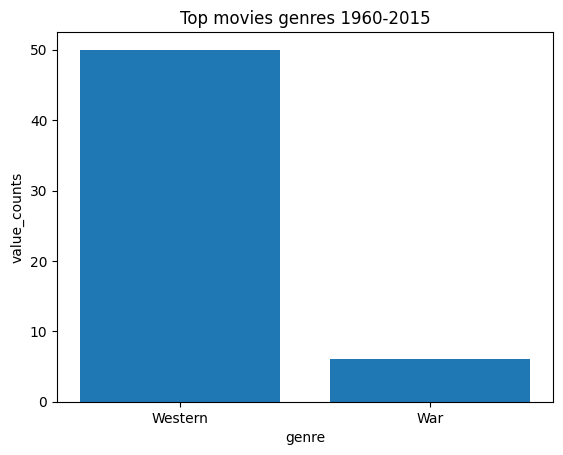

In [62]:
values = genre_popularity_means.groupby('release_year').max()['genres'].value_counts()
x = values.index
y = values.values
plt.title('Top movies genres 1960-2015')
plt.xlabel('genre')
plt.ylabel('value_counts')
plt.bar(x,y);

Western films were the most polular films for most of the years with value count of 50 pof out of 55, followed by war movies with a total count of 5.

### Research Question 2 - What is the most produced movies Genre?

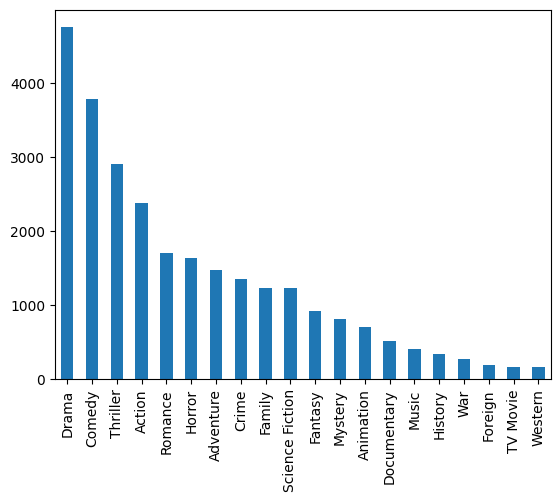

In [63]:
df_movies['genres'].value_counts().plot(kind='bar');

The drama genre is the produced film genre. Western movies are the least produced, a complete opposite in contrast with popularity of movies.

### Research Question 3 - Are movie production increasing over time?

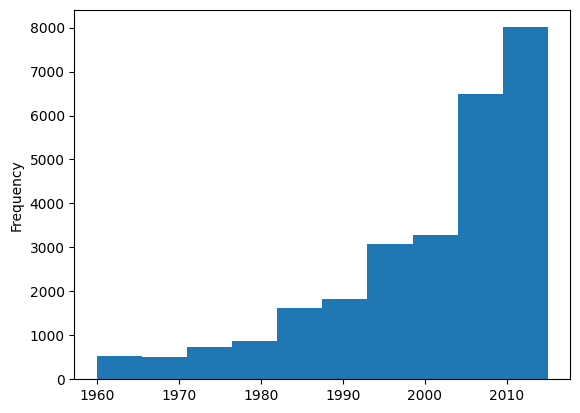

In [65]:
#plot histogram of count of movies released each year
df_movies['release_year'].plot(kind='hist');

The distribution of the histogram is skewed to the left. More and more movies are being produced each year.

### Research Question 4 - What are the most coslty movie genres to produce?

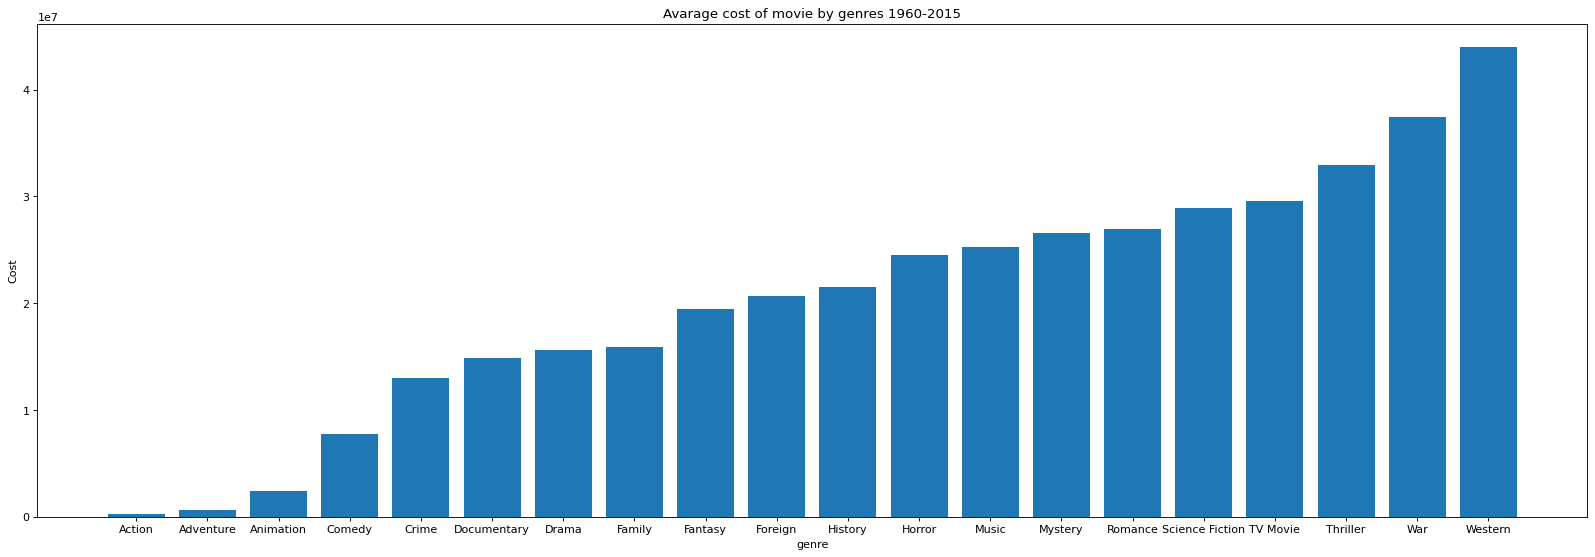

In [68]:
mean_genre_budget = df_movies.groupby(['genres'])['budget_adj'].mean()
plt.figure(figsize=(25, 8), dpi=80)
plt.title('Avarage cost of movie by genres 1960-2015')
plt.xlabel('genre')
plt.ylabel('Cost')
plt.bar(mean_genre_budget.index, sorted(mean_genre_budget.values));

Action movies are the least costly movies to produce and Adventures are the second least costly.
Western movies and War movies are amoung the most expensive movies to make
[Jouni K. Seppänen] https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib

### Research Question 4 - Is there any collection between the average vote a movies receives and its budget?

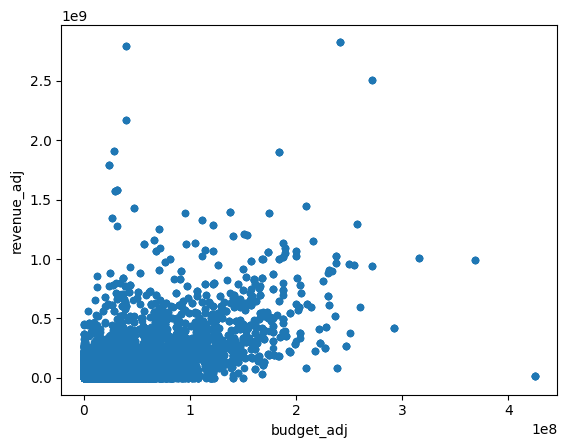

In [70]:
#finding the relationship between movie budget and vote average
df_movies.plot(x='budget_adj', y='revenue_adj', kind='scatter');

Its appears there somewhat of a possitive correction between the votes received and the budget of the movie. On average a movie with a high budget will receive a higher rating.

<a id='conclusions'></a>
## Conclusions

From the investigation it appears there is a correlation between a movie budget and the votes it receives. On average, the cost for making a western movies is higher tha all other, this may be resultant form inflation adjustment. Drama is the most made movie genre, this maybe because it is amoung the least costly movie genre to make. More movies are being made each year accoss all genres. Western movies are the most popular, this maybe the amoung the first movie genres to be made.